In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [2]:
nodes = pd.read_csv('../data/nodes.csv')
edges = pd.read_csv('../data/edges.csv')

In [3]:
comps = (nodes[':LABEL'] == 'Compound').sum() 
diseases = (nodes[':LABEL'] == 'Disease').sum()

print('{:,} Compounds x {:,} Diseases = {:,} C-D pairs'.format(comps, diseases, comps*diseases))

20,196 Compounds x 4,943 Diseases = 99,828,828 C-D pairs


In [4]:
nodes.head()

,:ID,name,:LABEL
0,C0026879,Mutagens,Chemicals & Drugs
1,C0017725,Glucose,Chemicals & Drugs
2,C0006147,Breast Feeding,Physiology
3,C0279494,Oestrogen therapy,Procedures
4,C0232338,Blood flow,Physiology


In [5]:
edges.head()

,:START_ID,:END_ID,:TYPE
0,C0026879,C0220806,ISA_CDi>CD
1,C0017725,C0022378,PART_OF_CDpo>A
2,C0006147,C0020114,PROCESS_OF_PSproLB
3,C0279494,C0043210,TREATS_PRtLB
4,C0232338,C0012984,PROCESS_OF_PSproLB


In [6]:
print(edges.shape[0])
edges = edges.drop_duplicates()
edges = edges.dropna()
edges.shape

20891084


(20544920, 3)

In [7]:
counts = edges[":TYPE"].value_counts()
counts

INTERACTS_WITH_CDiwCD         828685
LOCATION_OF_AloCD             800579
STIMULATES_CDstCD             452324
COEXISTS_WITH_CDcwCD          450955
INTERACTS_WITH_GiwCD          424928
LOCATION_OF_AloG              419681
PROCESS_OF_DOproLB            410718
INHIBITS_CDin>CD              379340
LOCATION_OF_AloDO             366582
LOCATION_OF_LBloCD            352224
AFFECTS_CDafPS                351362
PART_OF_CDpo>A                317538
STIMULATES_GstCD              317084
TREATS_CDtDO                  310916
TREATS_PRtDO                  292562
USES_PRuCD                    278386
COEXISTS_WITH_DOcwDO          259293
COEXISTS_WITH_CDcwG           255227
COEXISTS_WITH_DOcwD           243032
PART_OF_Gpo>A                 234502
ASSOCIATED_WITH_CDawDO        217893
PART_OF_Apo>A                 202994
CAUSES_CDcDO                  202497
PART_OF_CDpo>LB               193324
compared_with_CDcpwCD         186585
LOCATION_OF_LBloG             185404
ASSOCIATED_WITH_CDawD         178711
T

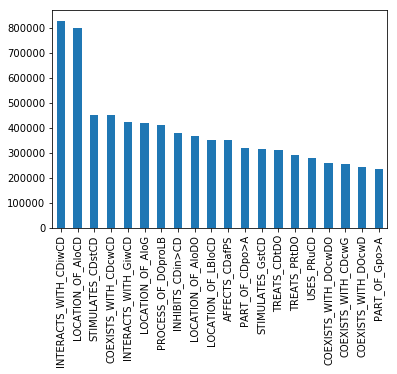

In [8]:
counts[:20].plot(kind='bar');

Several relationships with low counts, A->B and B->A relationships could potentially be combined into A-B relationships

# Filter out the lower count edge types

In [9]:
'{:,}'.format(edges.shape[0])

'20,544,920'

In [10]:
cutoff = .001

print("Number of edge types with this cutoff: {}".format((counts > cutoff*len(edges)).sum()))
print("Number of edges that remain with this cutoff: {:,}".format(counts[counts > cutoff*len(edges)].sum()))

Number of edge types with this cutoff: 157
Number of edges that remain with this cutoff: 17,694,379


In [11]:
ok_edges = list(counts[counts > cutoff*len(edges)].index)

In [12]:
edges.columns = ['START_ID', 'END_ID', 'TYPE']

result = edges.query('TYPE in @ok_edges')

result.columns = [':START_ID', ':END_ID', ':TYPE']

In [13]:
'{:,}'.format(result.shape[0])

'17,694,379'

# Some quick validation that all ids are the same between nodes and edges

In [14]:
edge_ids = set(result[':START_ID'].unique()).intersection(set(result[':END_ID'].unique()))

In [15]:
node_ids = set(nodes[':ID'].unique())

In [16]:
not_in_edges = node_ids - edge_ids

In [17]:
not_in_edges = list(not_in_edges)

In [18]:
nodes.columns = ['ID', 'name', 'LABEL']
idx = nodes.query('ID in @not_in_edges').index
nodes.columns = [':ID', 'name', ':LABEL']
nodes.loc[idx]

,:ID,name,:LABEL
31,C1273870,Management procedure,Activities & Behaviors
61,C0008044,Chicago,Geographic Areas
81,C0002424,Ambulatory Care Facilities,Organizations
134,C0597198,Performance,Activities & Behaviors
194,C0019994,Hospitals,Organizations
198,C0015272,Exhibits,Concepts & Ideas
256,C0001712,Aerosols,Objects
281,C0199960,Transfusion - action,Concepts & Ideas
283,C0020026,"Hospitals, State",Organizations
301,C1074887,Bufo stomaticus,Living Beings


In [19]:
nodes = nodes.drop(idx)

In [20]:
len(nodes)

167212

In [21]:
result = result.sort_values(':TYPE')
nodes = nodes.sort_values(':LABEL')

In [22]:
result.to_csv('../data/edges_filtered_001.csv', index=False)
nodes.to_csv('../data/nodes_filtered_001.csv', index=False)

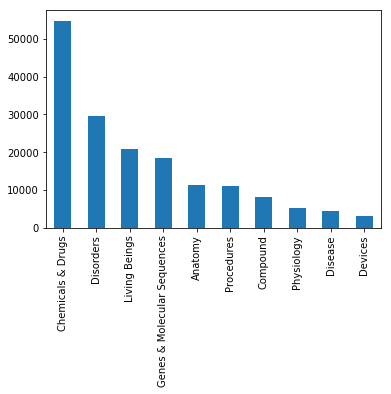

In [23]:
nodes[':LABEL'].value_counts().plot(kind='bar');